# Taher Muhammedali - 0478012

## Assignment 1 - Task 3 - Data Science ESM

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### (a)

In [2]:
# Reading CSV file and separating on ;

In [3]:
fn = "https://tubcloud.tu-berlin.de/s/JamLFf2Pjc6KHfp/download/Industrial_Database.csv"
df = pd.read_csv(fn, sep=';', index_col=0)
df.head(2)

,SiteID,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total
0,1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01
1,2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36


### (b)

In [4]:
# Converting Dataframe to GeoDataframe with geom2 referencing the Geometry points. Index is SiteID

In [5]:
df['geom2'] = gpd.GeoSeries.from_wkt(df.geom, crs=4326) 
gdf = gpd.GeoDataFrame(df, geometry=df.geom2, crs=4326) # Unnecessary step, was not required
gdf.set_index('SiteID').head(2)

,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total,geom2,geometry
SiteID,,,,,,,,,,,,,,,,,,,
1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01,POINT (15.06781 47.03378),POINT (15.06781 47.03378)
2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36,POINT (14.34306 48.28194),POINT (14.34306 48.28194)


### (c)

In [6]:
# Counting cells where Geometry information is missing

In [7]:
print("Location data is missing for %s industrial sites" % gdf['geometry'].isnull().sum())

Location data is missing for 515 industrial sites


### (d)

In [8]:
# Plotting on Plate Carree Projection. Circle colours are Subsectors, Circle size is with respect to the emissions 

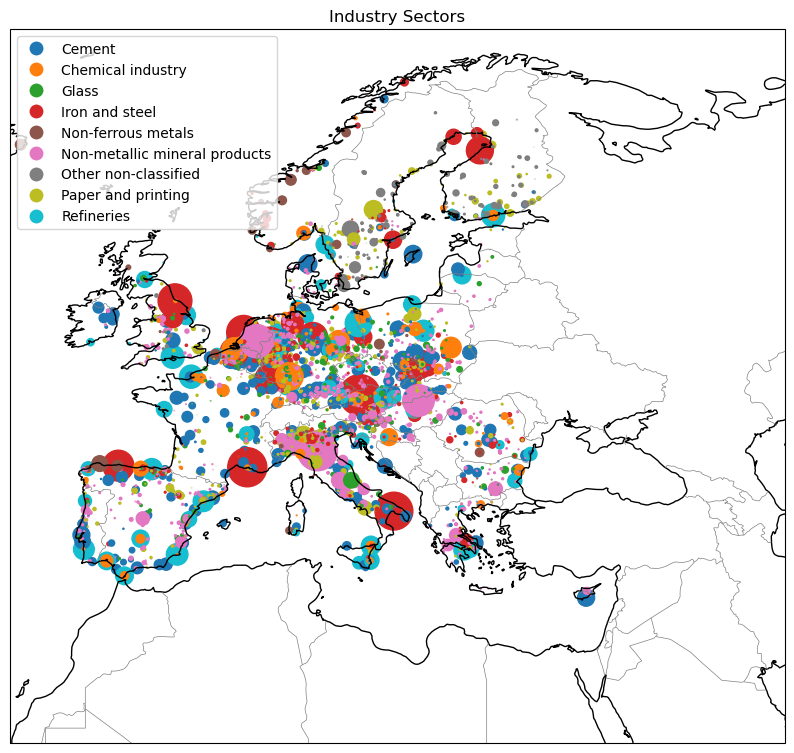

In [9]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())

gdf.plot(ax=ax,
        column='Subsector',
        legend=True,
        markersize=gdf.Emissions_ETS_2014/1e4) # Emissions divided by 1000 to provide better visibility of all points
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
ax.set_title("Industry Sectors")
ax.set_extent([-15, 50, 25, 70]) # Extent set manually with testing

### (e)

In [10]:
# Plotting bar chart for Industries with respect to their total Emissions

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Iron and steel'),
  Text(1, 0, 'Cement'),
  Text(2, 0, 'Refineries'),
  Text(3, 0, 'Paper and printing'),
  Text(4, 0, 'Chemical industry'),
  Text(5, 0, 'Glass'),
  Text(6, 0, 'Non-ferrous metals'),
  Text(7, 0, 'Non-metallic mineral products'),
  Text(8, 0, 'Other non-classified')])

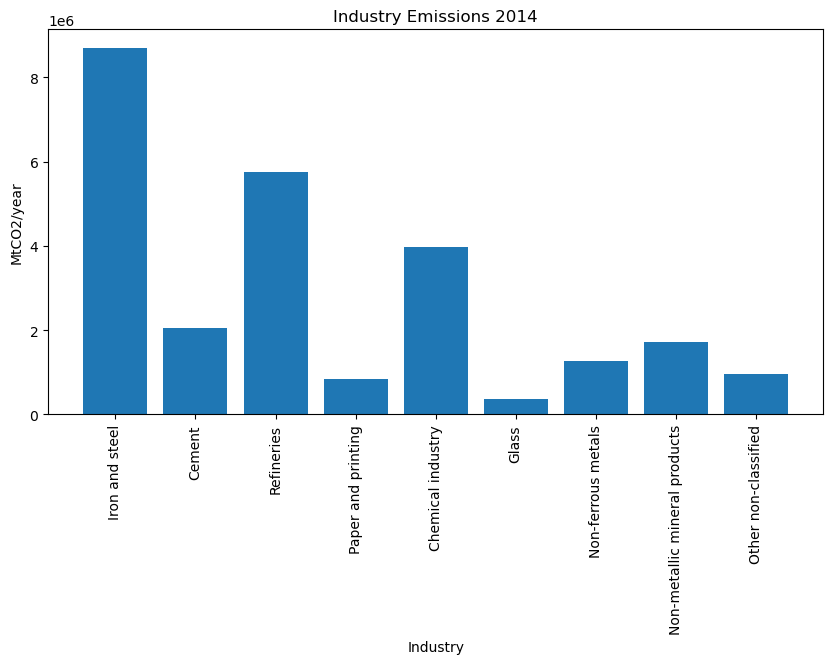

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(gdf.Subsector, gdf.Emissions_ETS_2014)

ax.set_xlabel("Industry")
ax.set_ylabel("MtCO2/year")
ax.set_title("Industry Emissions 2014")
plt.xticks(rotation='vertical') # Rotated xlabels to vertical for readability

### (f)

In [12]:
# Finding and printing Industry with highest Emissions and their share

In [13]:
gdf_grp = gdf.groupby("Subsector").Emissions_ETS_2014.sum()
gdf_grp.idxmax()
print(gdf_grp.idxmax(),"Industry has the highest ETS Emissions, their share is",round(((gdf_grp.max()/gdf_grp.sum())*100),2),"%")

Cement Industry has the highest ETS Emissions, their share is 26.69 %


### (g)

In [14]:
# Three countries with the highest Emissions in Chemical sector

In [15]:
chemical = gdf.loc[gdf.Subsector == "Chemical industry"]
chem_gb = chemical.groupby("Country").Emissions_ETS_2014.sum()
chem_gb.nlargest(3)

Country
Germany        18070142.0
Netherlands     9311542.0
Poland          6839464.0
Name: Emissions_ETS_2014, dtype: float64

### (h)

In [16]:
# Finding country with highest emissions in each sector

In [17]:
capacities = gdf.groupby(["Country", "Subsector"]).Emissions_ETS_2014.sum()
emistot = capacities.unstack()
emistot.idxmax()

Subsector
Cement                            Germany
Chemical industry                 Germany
Glass                             Germany
Iron and steel                    Germany
Non-ferrous metals                Germany
Non-metallic mineral products      Poland
Other non-classified             Bulgaria
Paper and printing                Germany
Refineries                        Germany
dtype: object

### (i)

In [18]:
# Finding sector with highest emissions in each country

In [19]:
emistot_t = capacities.unstack().T
emistot_t.idxmax()

Country
Austria                 Iron and steel
Belgium                         Cement
Bulgaria                        Cement
Croatia           Other non-classified
Cyprus                          Cement
Czech Republic                  Cement
Denmark                         Cement
Estonia             Paper and printing
Finland                 Iron and steel
France                          Cement
Germany                 Iron and steel
Greece                          Cement
Hungary                     Refineries
Iceland             Non-ferrous metals
Ireland                         Cement
Italy                       Refineries
Latvia                          Cement
Liechtenstein                   Cement
Lithuania                   Refineries
Luxembourg                      Cement
Netherlands                 Refineries
Norway              Non-ferrous metals
Poland                          Cement
Portugal                        Cement
Romania                         Cement
Slovakia         

### (j)

In [20]:
# Listing 20 German companies responsible for the highest emissions with their respective emissions

In [21]:
germany = gdf.loc[gdf.Country == "Germany"]
germany1 = germany.loc[germany.Emissions_ETS_2014.nlargest(20).index]
germany2 = germany1.sort_values(by=["Emissions_ETS_2014"], ascending=False)
germany3 = germany2["CompanyName"]
germany4 = germany2["Emissions_ETS_2014"]

data = []
xyz = pd.DataFrame(data)
xyz['Country'] = germany3
xyz['Emissions_ETS_2014'] = germany4
xyz.reset_index(drop=True)

,Country,Emissions_ETS_2014
0,ThyssenKrupp Steel Europe AG,8015583.0
1,Hüttenwerke Krupp Mannesmann GmbH,4666233.0
2,RUHR OEL GmbH,4568524.0
3,Salzgitter Flachstahl GmbH Abt. Umweltschutz /...,4465254.0
4,ROGESA Roheisengesellschaft Saar mbH,4223992.0
5,BASF,3974214.0
6,PCK Raffinerie GmbH Schwedt,3714705.0
7,Werk 1 MIRO-Mineralölraffinerie Oberrhein GmbH...,2782816.0
8,ArcelorMittal Bremen GmbH,2455775.0
9,SKW Stickstoffwerke Piesteritz GmbH,2394804.0


### (k)

In [22]:
# Plotting chloropleth map of NUTS-2 region

Text(0.5, 1.0, 'Choropleth Map of Emissions 2014')

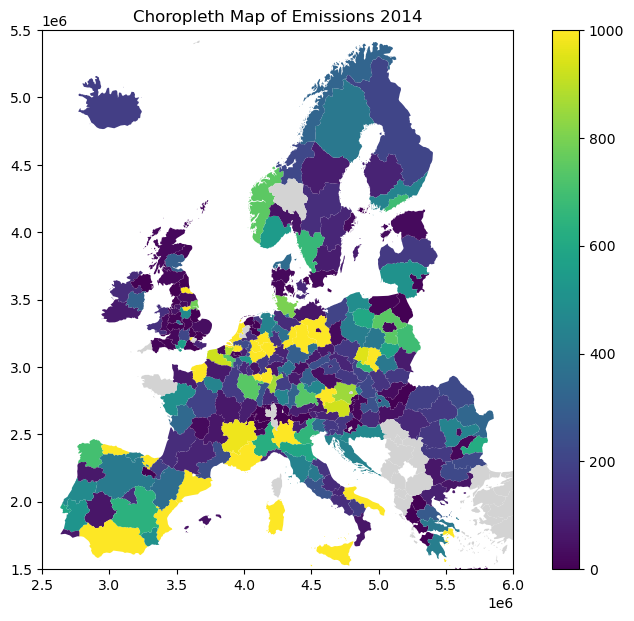

In [23]:
#importing and converting
nuturl = "https://tubcloud.tu-berlin.de/s/5WJ6pGsBKR7a3sp/download/NUTS_RG_10M_2021_4326.geojson"
nuts = gpd.read_file(nuturl)
nuts = nuts.set_index('id')
nuts2 = nuts.query("LEVL_CODE == 2").to_crs(3035)
gdf2 = gdf.to_crs(3035)

#Joining and grouping
joined2 = gdf2.sjoin(nuts2)
groupby2 = joined2.groupby("NUTS_ID").Emissions_ETS_2014.sum()/5000 # (Divided Emissions by 5000 through trial & error to get more gradients on the plot)
groupby2 = groupby2.reindex(nuts2.index)

#Plotting
nuts2.plot(figsize=(10,7), column=groupby2, vmax=1000,legend=True, missing_kwds=dict(color='lightgrey'))
plt.ylim(1.5e6, 5.5e6)
plt.xlim(2.5e6, 6e6)
plt.title("Choropleth Map of Emissions 2014")

### 

### (l)

In [24]:
# Finding NUTS-3 region with highest industry emissions, companies and their sectors

In [25]:
nuts3 = nuts.query("LEVL_CODE == 3").to_crs(3035)
gdf3 = gdf.to_crs(3035)
joined3 = gdf3.sjoin(nuts3)
groupby3 = joined3.groupby("NUTS_ID").Emissions_ETS_2014.sum()
groupby3 = groupby3.reindex(nuts3.index)
nut3high = joined3.loc[joined3['NUTS_ID'] == groupby3.idxmax()]

print("Country with highest industry Emissions has a NUTS-3 ID of %s and the country is %s" % (groupby3.idxmax(), nut3high.Country.unique().tolist()))

Country with highest industry Emissions has a NUTS-3 ID of DEA12 and the country is ['Germany']


In [26]:
# Finding companies in Germany and their sectors

In [27]:
nut3onlyCS = nut3high[["CompanyName","Subsector"]]
nut3onlyCS.drop_duplicates() # Removing duplicate rows

,CompanyName,Subsector
142,Hüttenwerke Krupp Mannesmann GmbH,Iron and steel
146,ThyssenKrupp Steel AG,Iron and steel
147,ThyssenKrupp Steel Europe AG,Iron and steel
152,DK Recycling und Roheisen GmbH,Iron and steel
157,voestalpine Bahnsysteme GmbH,Iron and steel
158,ArcelorMittal Ruhrort GmbH,Iron and steel
159,Pruna Betreiber GmbH vertreten durch die KBS GmbH,Iron and steel
1395,Huntsman Corporation,Chemical industry
1900,Emscher Aufbereitung GmbH,Iron and steel
2171,Outokumpu VDM GmbH,Non-ferrous metals
